In [1]:
import pandas as pd

df = pd.read_csv('bill_data.csv')

df.head()

house_bill  senate_bill  bill_number legislative_session  \
0        True        False            1                 781   
1        True        False            2                 781   
2        True        False            3                 781   
3        True        False            4                 781   
4        True        False            5                 781   

   num_of_joint_authors  num_of_co_authors  num_of_subjects  passed  \
0                     0                  0                2   False   
1                     0                  0                0   False   
2                     1                  0                2   False   
3                     0                  0                1   False   
4                     0                  0                3    True   

   male_house_members  male_senate_members  ...  senate_members_age_40_to_49  \
0                 118                   27  ...                            7   
1                 118                   27  ...                            7   
2                 118                   27  ...                            7   
3                 118                   27  ...                            7   
4                 118                   27  ...                            7   

   house_members_age_50_to_59  senate_members_age_50_to_59  \
0                          31                           19   
1                          31                           19   
2                          31                           19   
3                          31                           19   
4                          31                           19   

   house_members_age_60_to_69  house_members_age_over_70  \
0                           5                          8   
1                           5                          8   
2                           5                          8   
3                           5                          8   
4                           5                          8   

   senate_members_age_over_70  house_committee_democrats  \
0                           0                          5   
1                           0                          3   
2                           0                          6   
3                           0                          4   
4                           0                         12   

   house_committee_republicans  senate_committee_democrats  \
0                            7                           0   
1                            7                           0   
2                            9                           0   
3                            6                           0   
4                           18                           0   

   senate_committee_republicans  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 35 columns]

In [2]:
X = df.copy()
X.pop('bill_number')
X.pop('legislative_session')
X["house_bill"] = X["house_bill"].astype(int)
X["senate_bill"] = X["senate_bill"].astype(int)
X["passed"] = X["passed"].astype(int)
y = X.pop('passed')

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    
    layers.Dense(1, activation='sigmoid'),
])

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [5]:
model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)
model.save('./the_model')

Epoch 1/200
97/97 [==============================] - 2s 9ms/step - loss: 0.5718 - binary_accuracy: 0.7362 - val_loss: 0.8263 - val_binary_accuracy: 0.7932
Epoch 2/200
97/97 [==============================] - 1s 7ms/step - loss: 0.4602 - binary_accuracy: 0.8027 - val_loss: 0.5419 - val_binary_accuracy: 0.7931
Epoch 3/200
97/97 [==============================] - 1s 7ms/step - loss: 0.4382 - binary_accuracy: 0.8106 - val_loss: 0.4222 - val_binary_accuracy: 0.8060
Epoch 4/200
97/97 [==============================] - 1s 7ms/step - loss: 0.4265 - binary_accuracy: 0.8148 - val_loss: 0.3986 - val_binary_accuracy: 0.8278
Epoch 5/200
97/97 [==============================] - 1s 6ms/step - loss: 0.4197 - binary_accuracy: 0.8176 - val_loss: 0.3973 - val_binary_accuracy: 0.8284
Epoch 6/200
97/97 [==============================] - 1s 6ms/step - loss: 0.4154 - binary_accuracy: 0.8195 - val_loss: 0.3971 - val_binary_accuracy: 0.8279
Epoch 7/200
97/97 [==============================] - 1s 6ms/step - los

In [6]:
import pandas as pd
testDF = pd.read_csv('bill_data.csv')
T = testDF.copy()
T["house_bill"] = T["house_bill"].astype(int)
T["senate_bill"] = T["senate_bill"].astype(int)
T["passed"] = T["passed"].astype(int)

#legislative_session = "82R" #senate bil 1226
T = T.loc[(T['legislative_session'] == "82R") & (T['house_bill'] == 1) & (T['bill_number'] == 472)]
T.pop('bill_number')
T.pop('legislative_session')
T.pop('passed')

yhat = model.predict(T)
print(yhat)


1/1 [==============================] - 0s 121ms/step
[[0.17921513]]


515/515 [==============================] - 1s 1ms/step


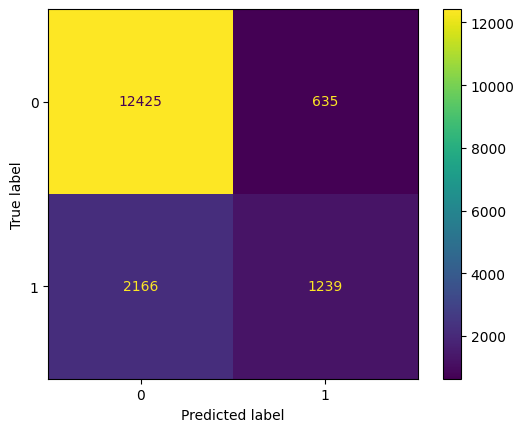

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_valid)
y_pred = [1 if i > .5 else 0 for i in y_pred]
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
